In [29]:
import pandas as pd

# Carregar os dados
data_path = 'car_prices.csv'
df = pd.read_csv(data_path)

# Exibir as primeiras linhas para entender a estrutura dos dados
df.head()



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [30]:
print('Shape:', df.shape)
print('Columns: ', df.columns)

Shape: (558837, 16)
Columns:  Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [31]:
# Análise exploratória básica

# Verificar a quantidade de valores ausentes por coluna
missing_values = df.isnull().sum()

# Estatísticas descritivas para variáveis numéricas
descriptive_stats = df.describe()

missing_values


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [32]:
descriptive_stats

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [33]:
# Tratamento de valores ausentes

# Preenchendo valores ausentes em variáveis categóricas com 'Desconhecido'
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
for column in categorical_columns:
    df[column].fillna('Desconhecido', inplace=True)

# Preenchendo valores ausentes em 'condition' e 'odometer' com a mediana
for column in ['condition', 'odometer']:
    df[column].fillna(df[column].median(), inplace=True)

# Removendo linhas onde 'mmr' ou 'sellingprice' estão ausentes
df.dropna(subset=['mmr', 'sellingprice'], inplace=True)

# Verificação final dos valores ausentes
final_missing_values = df.isnull().sum()

# Estatísticas descritivas atualizadas
updated_descriptive_stats = df.describe()

final_missing_values


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [34]:
updated_descriptive_stats

,year,condition,odometer,mmr,sellingprice
count,558799.000000,558799.000000,558799.000000,558799.000000,558799.000000
mean,2010.038633,30.763892,68321.127182,13769.377495,13611.356296
std,3.966830,13.275258,53394.048920,9679.967174,9749.728196
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28378.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99105.500000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


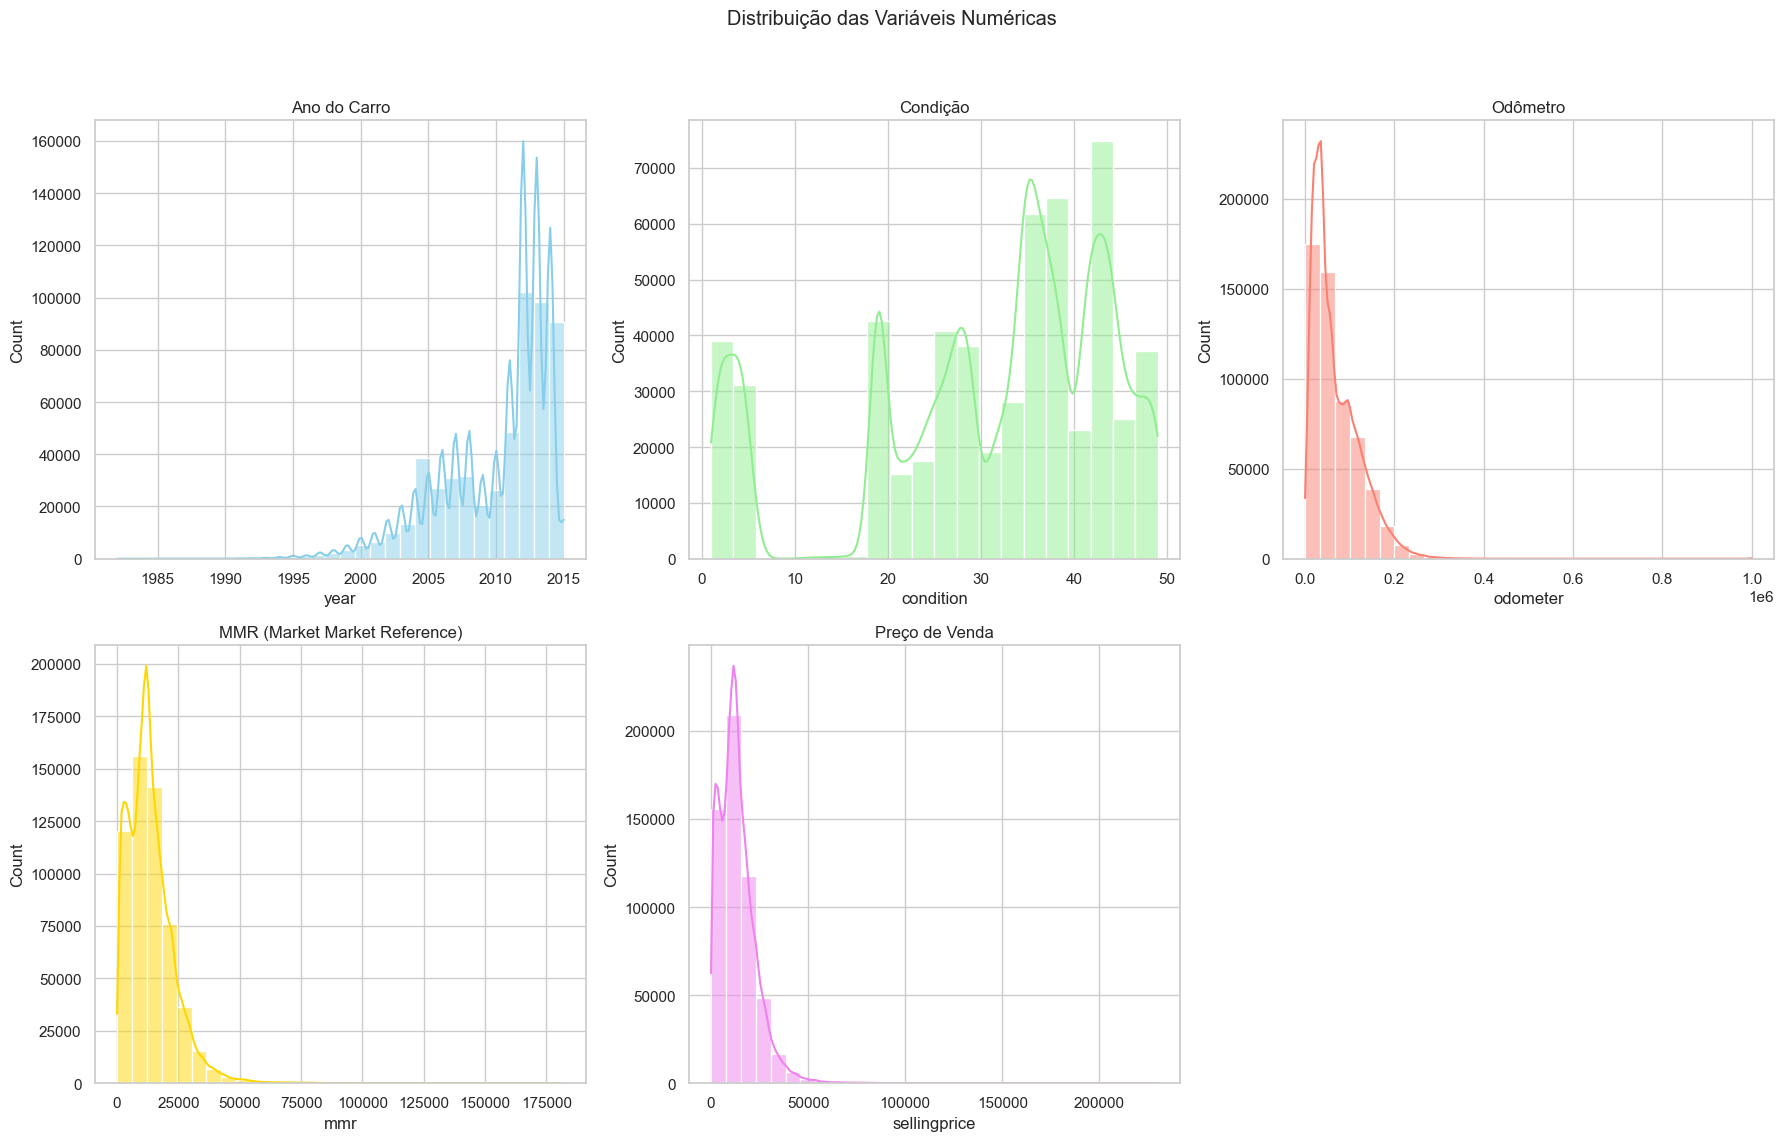

Marcas mais comuns:
Ford         93553
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30708
Honda        27206
Hyundai      21811
BMW          20719
Kia          18075
Chrysler     17274
Name: make, dtype: int64

Tipos de carroceria mais comuns:
Sedan           199429
SUV             119292
sedan            41903
suv              24552
Hatchback        21380
Minivan          21363
Coupe            14602
Wagon            13629
Crew Cab         13280
Desconhecido     13195
Name: body, dtype: int64

Transmissões mais comuns:
automatic       475904
Desconhecido     65351
manual           17544
Name: transmission, dtype: int64

Estados com mais vendas:
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23478
nc    21845
oh    21575
tn    20895
Name: state, dtype: int64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Preparando as figuras para as variáveis numéricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuição das Variáveis Numéricas')

# Histogramas para variáveis numéricas
sns.histplot(df['year'], bins=30, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Ano do Carro')

sns.histplot(df['condition'], bins=20, ax=axes[0, 1], kde=True, color='lightgreen')
axes[0, 1].set_title('Condição')

sns.histplot(df['odometer'], bins=30, ax=axes[0, 2], kde=True, color='salmon')
axes[0, 2].set_title('Odômetro')

sns.histplot(df['mmr'], bins=30, ax=axes[1, 0], kde=True, color='gold')
axes[1, 0].set_title('MMR (Market Market Reference)')

sns.histplot(df['sellingprice'], bins=30, ax=axes[1, 1], kde=True, color='violet')
axes[1, 1].set_title('Preço de Venda')

# Removendo o subplot vazio
fig.delaxes(axes[1][2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Análise de variáveis categóricas mais comuns
print("Marcas mais comuns:")
print(df['make'].value_counts().head(10))
print("\nTipos de carroceria mais comuns:")
print(df['body'].value_counts().head(10))
print("\nTransmissões mais comuns:")
print(df['transmission'].value_counts())
print("\nEstados com mais vendas:")
print(df['state'].value_counts().head(10))



# Ano do Carro: A maioria dos carros no dataset são modelos recentes, com uma concentração significativa nos anos mais próximos a 2015.
# Condição: A condição dos carros varia bastante, mas há uma tendência de agrupamento em torno de valores médios, sugerindo uma avaliação geral em condições "boas" ou "justas".
# Odômetro: A distribuição do odômetro mostra uma concentração maior em valores mais baixos, indicando um número significativo de carros com menos quilometragem. Há, no entanto, uma cauda longa, sugerindo a presença de carros com alta quilometragem.
# MMR (Market Market Reference): O MMR tem uma distribuição semelhante ao preço de venda, com uma ampla gama de valores mas concentrados na faixa inferior.
# Preço de Venda: A distribuição do preço de venda também está concentrada em valores mais baixos, com alguns valores extremos de carros vendidos por preços muito altos.


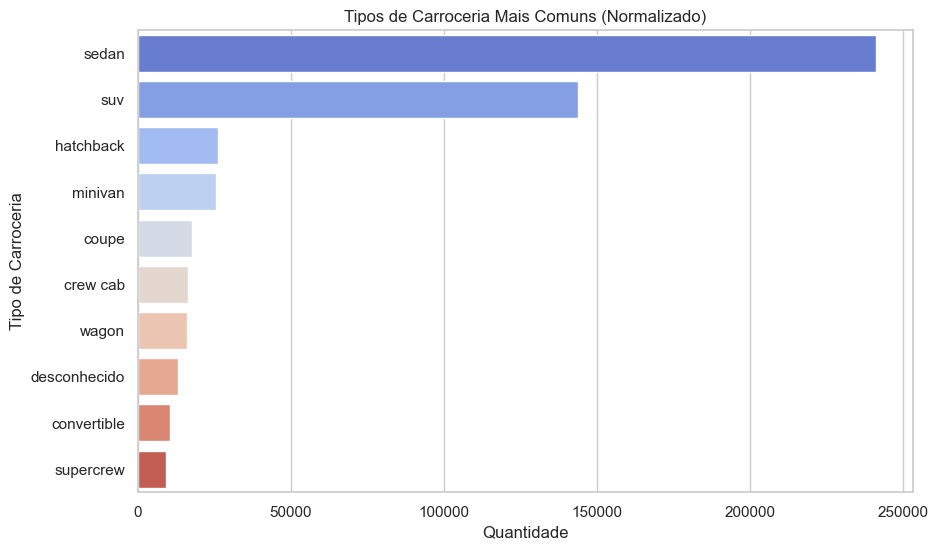

In [36]:
# Normalizando as categorias de tipos de carroceria para corrigir duplicidades devido a diferenças na capitalização
df['body_normalized'] = df['body'].str.lower()

# Agora vamos criar um gráfico para mostrar os tipos de carroceria mais comuns, considerando a normalização
plt.figure(figsize=(10, 6))
body_count_normalized = df['body_normalized'].value_counts().head(10)
sns.barplot(x=body_count_normalized.values, y=body_count_normalized.index, palette='coolwarm')
plt.title('Tipos de Carroceria Mais Comuns (Normalizado)')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Carroceria')
plt.show()

# Como esperado, sedan e suv são os tipos de carroceria dominantes, seguidos por hatchback, minivan, e coupe, entre outros. Isso reforça a observação anterior de que esses dois tipos de carroceria são particularmente populares no mercado de carros usados.

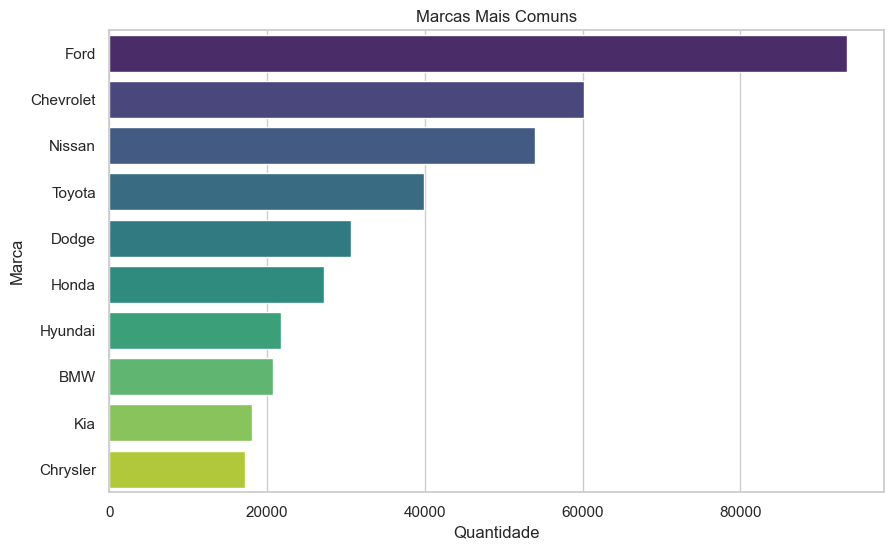

In [37]:
# Criando um gráfico para as marcas mais comuns
plt.figure(figsize=(10, 6))
make_count = df['make'].value_counts().head(10)
sns.barplot(x=make_count.values, y=make_count.index, palette='viridis')
plt.title('Marcas Mais Comuns')
plt.xlabel('Quantidade')
plt.ylabel('Marca')
plt.show()

# O gráfico abaixo mostra as marcas mais comuns no conjunto de dados. Ford, Chevrolet e Nissan lideram em popularidade, o que indica a preferência dos consumidores por essas marcas no mercado de carros usados. A presença dessas marcas no topo da lista sugere não apenas sua popularidade, mas também pode refletir uma maior disponibilidade de opções de modelos, confiabilidade percebida ou valor de revenda.

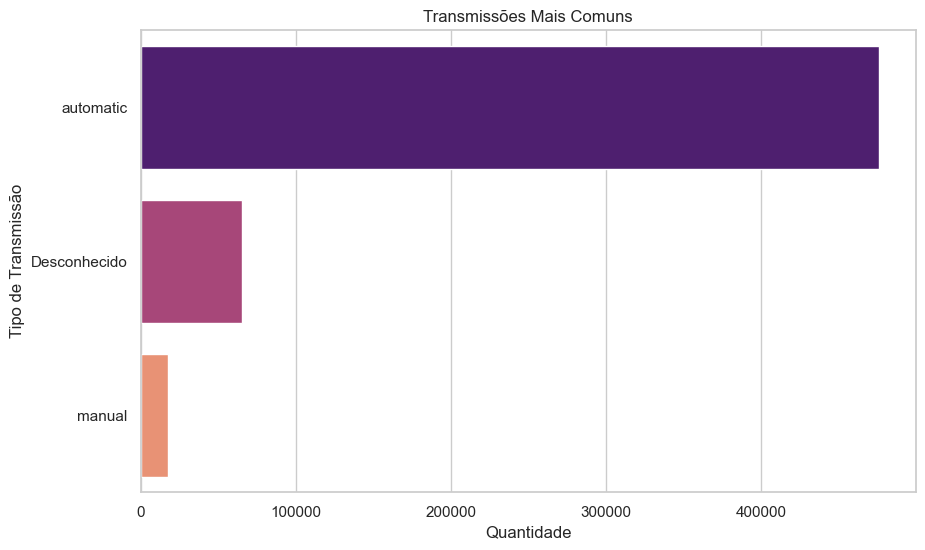

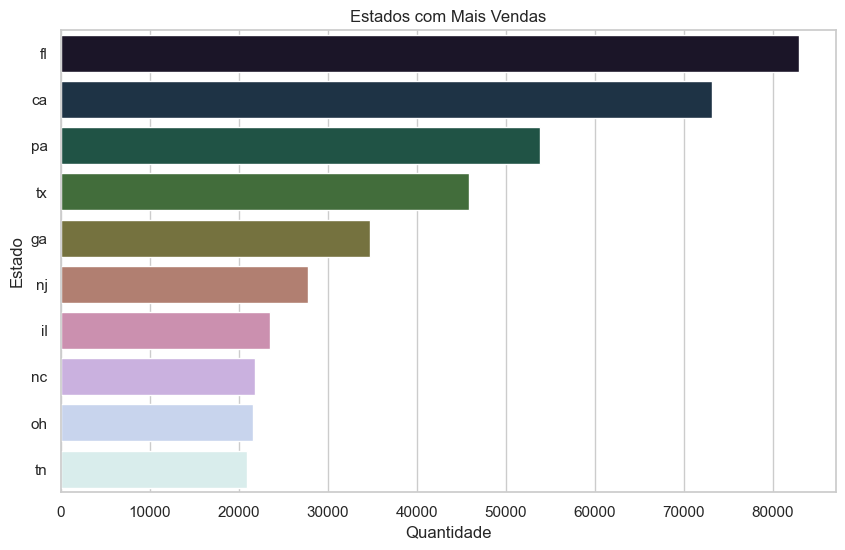

In [38]:
# Gráfico para Transmissões Mais Comuns
transmission_count = df['transmission'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=transmission_count.values, y=transmission_count.index, palette='magma')
plt.title('Transmissões Mais Comuns')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Transmissão')
plt.show()

# Gráfico para Estados com Mais Vendas
state_count = df['state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_count.values, y=state_count.index, palette='cubehelix')
plt.title('Estados com Mais Vendas')
plt.xlabel('Quantidade')
plt.ylabel('Estado')
plt.show()

# O primeiro gráfico mostra a predominância de transmissões automáticas sobre as manuais e os registros sem informação de transmissão. Isso evidencia a preferência do consumidor pela conveniência da transmissão automática.

# O segundo gráfico destaca os estados com maior atividade no mercado de carros usados, com a Flórida, Califórnia e Pensilvânia no topo. Esses estados são importantes mercados devido à sua densidade populacional e potencial econômico.

## Conceitos Importantes

#### Accuracy

* Accuracy (Acurácia) é a métrica mais simples e direta, representando a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões feitas. É calculada como o número de previsões corretas dividido pelo número total de previsões. No entanto, a acurácia pode ser enganosa em conjuntos de dados desequilibrados, onde uma classe é muito mais frequente do que outras.
    * No nosso caso, a acurácia foi de aproximadamente 62.8%, indicando que o modelo previu corretamente se um carro foi vendido acima ou abaixo do MMR em 62.8% das vezes no conjunto de teste.
    
#### Macro Average

* Macro avg (Média Macro) calcula a média aritmética das métricas (precisão, recall, f1-score) para cada classe, sem levar em conta o suporte (quantidade de instâncias) de cada classe. Isso significa que todas as classes têm o mesmo peso, independentemente de sua frequência no conjunto de dados. A média macro é especialmente útil quando você quer tratar todas as classes igualmente e está preocupado com o desempenho em classes menos frequentes.
    * No nosso modelo, a média macro de precisão, recall e f1-score foi de aproximadamente 0.63.

#### Weighted Average

* Weighted avg (Média Ponderada) também calcula a média das métricas para cada classe, mas leva em consideração o suporte de cada classe. Isso significa que classes com mais instâncias têm mais peso na média final. A média ponderada é útil em conjuntos de dados desequilibrados, pois reflete o desempenho do modelo em relação à distribuição real das classes no conjunto de dados.
    * No nosso caso, a média ponderada leva em conta a proporção de carros vendidos acima e abaixo do MMR no conjunto de teste, resultando também em um valor aproximado de 0.63 para precisão, recall e f1-score.

### Regressão Logística 

In [26]:
# Vou definir que se o sellingprice é maior que o mmr, então o carro é considerado como vendido acima do preço de mercado (classe 1); caso contrário, é considerado vendido abaixo do preço de mercado (classe 0).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Criando a variável alvo
df['above_mmr'] = (df['sellingprice'] > df['mmr']).astype(int)

# Selecionando características para o modelo
# Para simplificar, vamos usar algumas características numéricas e converter as categóricas em numéricas
features = ['year', 'condition', 'odometer', 'make', 'body_normalized', 'transmission', 'state']
X = df[features].copy()

# Convertendo variáveis categóricas em numéricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

y = df['above_mmr']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização das características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Avaliando o modelo
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Acurácia:{accuracy}")
print("\nRelatório de Classificação:\n", classification_rep)

Acurácia:0.628248031496063

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65     59764
           1       0.60      0.60      0.60     51996

    accuracy                           0.63    111760
   macro avg       0.63      0.63      0.63    111760
weighted avg       0.63      0.63      0.63    111760



##### O modelo de Regressão Logística foi treinado e avaliado, resultando em uma acurácia de aproximadamente 62.8% no conjunto de teste. Aqui está um resumo da performance do modelo:

* Precision para a classe 0 (vendido abaixo do MMR) é de 0.65, indicando que, quando o modelo prevê que um carro foi vendido abaixo do MMR, ele está correto 65% das vezes.
* Precision para a classe 1 (vendido acima do MMR) é de 0.60, significando que, quando o modelo prevê que um carro foi vendido acima do MMR, ele está correto 60% das vezes.
* Recall para ambas as classes é de 0.65 para a classe 0 e 0.60 para a classe 1, indicando que o modelo consegue identificar corretamente 65% dos carros vendidos abaixo do MMR e 60% dos carros vendidos acima do MMR, respectivamente.
* A acurácia geral do modelo é de 62.8%, o que significa que ele faz a previsão correta (acima ou abaixo do MMR) para cerca de 63% dos carros no conjunto de teste.
* O "support" mostra quantas instâncias de cada classe o modelo teve que prever, fornecendo um contexto importante para interpretar as métricas de precisão, recall e f1-score.
    * Para a classe 0 (carros vendidos abaixo do MMR), o support é 59,764. Isso significa que há 59,764 carros no conjunto de teste que foram realmente vendidos abaixo do MMR.
    * Para a classe 1 (carros vendidos acima do MMR), o support é 51,996. Isso indica que existem 51,996 carros no conjunto de teste que foram realmente vendidos acima do MMR.

### Árvore de Decisão

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Carregar e preparar os dados
# ... assumindo que você já tem um DataFrame 'df' preparado conforme os passos anteriores ...

# Criando a variável alvo baseada no MMR e no preço de venda
df['above_mmr'] = (df['sellingprice'] > df['mmr']).astype(int)

# Seleção de características e criação da variável alvo
features = ['year', 'condition', 'odometer', 'make', 'body_normalized', 'transmission', 'state']
X = df[features].copy()

# Convertendo variáveis categóricas em numéricas
for column in X.select_dtypes(include=['object']).columns:
    X[column] = LabelEncoder().fit_transform(X[column])

y = df['above_mmr']

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização das características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialização e treinamento do modelo de Árvore de Decisão
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Previsões e avaliação do modelo
y_pred = decision_tree_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Exibindo os resultados
print(f"Acurácia: {accuracy}")
print("\nRelatório de Classificação:")
print(classification_report)


Acurácia: 0.5994452397995705

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62     59764
           1       0.57      0.57      0.57     51996

    accuracy                           0.60    111760
   macro avg       0.60      0.60      0.60    111760
weighted avg       0.60      0.60      0.60    111760



### O modelo de Árvore de Decisão foi treinado e avaliado, alcançando uma acurácia de aproximadamente 59.9% no conjunto de teste. Vejamos como ele se saiu em termos de precisão e recall:

* Precisão para a classe 0 (vendido abaixo do MMR) é de 0.63, indicando que o modelo prevê corretamente 63% dos carros vendidos abaixo do MMR.
* Precisão para a classe 1 (vendido acima do MMR) é de 0.57, mostrando que, quando o modelo prevê que um carro foi vendido acima do MMR, ele está correto 57% das vezes.
* Recall é de 0.62 para a classe 0 e 0.57 para a classe 1, significando que o modelo consegue identificar corretamente 62% dos carros vendidos abaixo do MMR e 57% dos carros vendidos acima do MMR.
* Support: Para a classe 0, o suporte é 59,764, e para a classe 1, é 51,996, mostrando o número de instâncias que o modelo precisou prever para cada classe.

### Floresta Aleatória 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd


# Criando a variável alvo
df['above_mmr'] = (df['sellingprice'] > df['mmr']).astype(int)

# Seleção de características
features = ['year', 'condition', 'odometer', 'make', 'body_normalized', 'transmission', 'state']
X = df[features]

# Convertendo variáveis categóricas em numéricas
for feature in X.columns:
    if X[feature].dtype == 'object':
        X[feature] = LabelEncoder().fit_transform(X[feature])

y = df['above_mmr']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização das características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do modelo RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_scaled, y_train)

# Avaliação do modelo
y_pred = random_forest.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibindo os resultados
print("Acurácia:", accuracy)
print("\nRelatório de Classificação:\n", report)


C:\Users\alexs\AppData\Local\Temp\ipykernel_3880\3758708440.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = LabelEncoder().fit_transform(X[feature])


Acurácia: 0.6548228346456693

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68     59764
           1       0.63      0.62      0.62     51996

    accuracy                           0.65    111760
   macro avg       0.65      0.65      0.65    111760
weighted avg       0.65      0.65      0.65    111760



### O modelo de Floresta Aleatória mostrou uma melhoria em performance, com uma acurácia de aproximadamente 65.5% no conjunto de teste. Aqui está uma visão geral de sua performance:

* Precisão para a classe 0 é de 0.67, indicando uma precisão de 67% para previsões de carros vendidos abaixo do MMR.
* Precisão para a classe 1 é de 0.63, mostrando que o modelo está correto 63% das vezes ao prever carros vendidos acima do MMR.
* Recall para a classe 0 é de 0.69, e para a classe 1, é 0.62, indicando que o modelo identifica corretamente 69% dos carros vendidos abaixo do MMR e 62% dos vendidos acima.
* Support: 59,764 instâncias para a classe 0 e 51,996 para a classe 1, fornecendo o contexto para as métricas de precisão, recall e f1-score.